# Bank Loan Prediction

In [135]:
# Importing Packages from Python 

#Importing the packages pandas,Numpy,SeaBorn,matplotlib,math and Numpy 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [136]:
# Importing Dataset

loan_data = pd.read_csv('C:/Users/Suraj/Jupyter Projects/Project 10 - Bank Loan/loan_prediction.csv')
loan_data.head(2)

#There are 8124 rows and 23 columns and  Class is the target variable

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [73]:
# Checking Datatypes of the data 

loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [75]:
# Checking dimensions of the dataset

loan_data.shape

#There are 614 rows and 13 columns.

(614, 13)

In [36]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# Step 2- EDA for Data Analysis

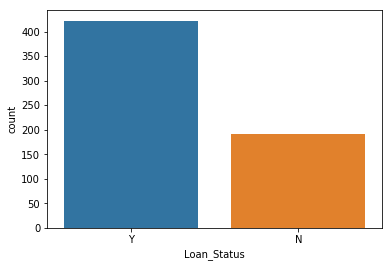

In [101]:
sns.countplot(x="Loan_Status",data=loan_data)

# The Loan_status section shows that very majority of the loans have been approved.

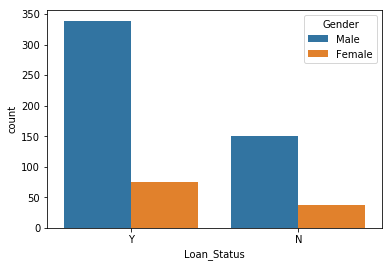

In [8]:
# Analysing by Gender 

sns.countplot(x="Loan_Status",hue="Gender",data=loan_data)

# Major part of loan applicants whose loans were approved were also Male and those whose loans were rejected were also male.

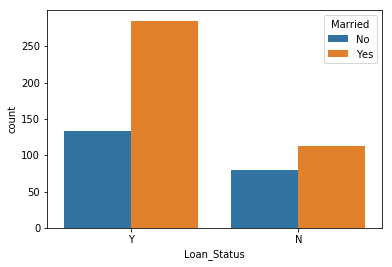

In [9]:
# Analysing by Marriage 

sns.countplot(x="Loan_Status",hue="Married",data=loan_data)

# The major number of loan applicants whose loans were approved were married and those whose loans were not approved too were
# married . We will alo be analysing other variables in depth.

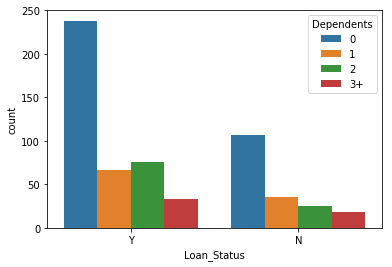

In [10]:
# Analysing by Dependents 

sns.countplot(x="Loan_Status",hue="Dependents",data=loan_data)

# The major number of people whose loans were approved had no dependents ,also the most number of people whose loans were not approved
# also has no dependents.


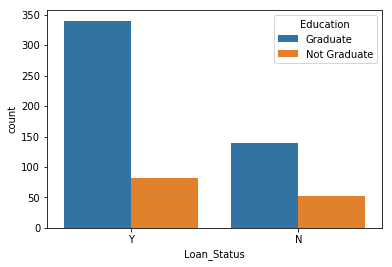

In [11]:
# Analysing by Education 

sns.countplot(x="Loan_Status",hue="Education",data=loan_data)

# Major people of Loan applicants whose loans were approved and rejected were Graduates.

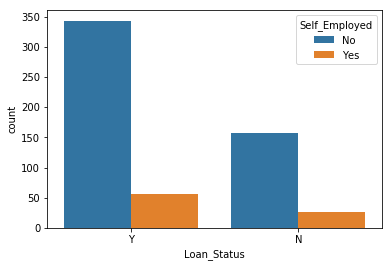

In [12]:
# Analysing By Self Employed

sns.countplot(x="Loan_Status",hue="Self_Employed",data=loan_data)

# Majority of the loan applicants were not self employed

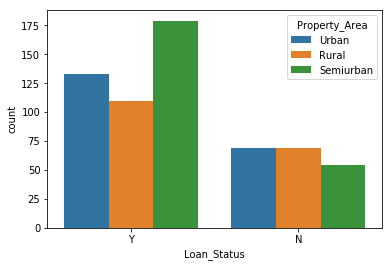

In [13]:
# Analysing by Property Area 


sns.countplot(x="Loan_Status",hue="Property_Area",data=loan_data)

# Major of loan applicants whose loans were approved are from Semiurban areas.            

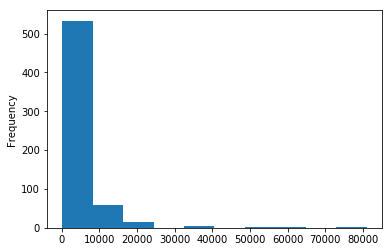

In [15]:
# Analysing numerical variables 

loan_data["ApplicantIncome"].plot.hist()

# We can see that the age of individuals is from 35-40

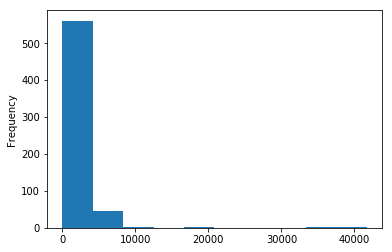

In [17]:
# Analysing numerical variables 

loan_data["CoapplicantIncome"].plot.hist()

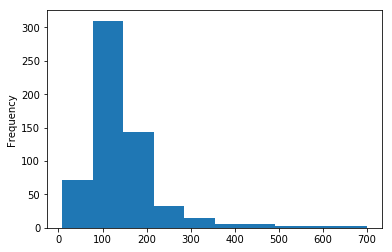

In [18]:
#Analysing Loan Amount 
loan_data["LoanAmount"].plot.hist()

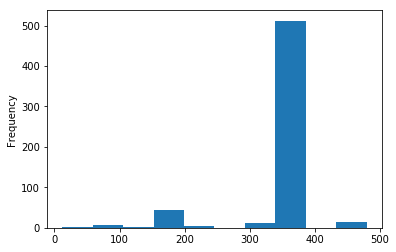

In [19]:
#Analysing Loan Amount 

loan_data["Loan_Amount_Term"].plot.hist()

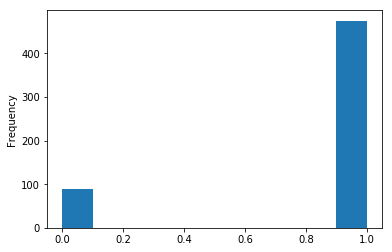

In [21]:
#Analysing Credit History 

loan_data["Credit_History"].plot.hist()

In [137]:

loan_data.isnull().sum()

# There are no missing values in the dataset. Hence data can be prepared by converting categorical to dummy variables to include them in 

#the model

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [138]:
# Replacing missing values of Gender with F Gender

loan_data["Gender"].fillna("F", inplace = True)

In [139]:
# Replacing missing values of Marriage with No 

loan_data["Married"].fillna("No", inplace = True)

In [140]:
# Replacing missing values of Dependents with 0

loan_data["Dependents"].fillna("0", inplace = True)

In [141]:
# Replace Self Employed vales of Dependents with 0 

loan_data["Self_Employed"].fillna("No", inplace = True)

In [142]:
from statistics import mean

In [143]:
# Replacing Loan amount with mean of the same 

loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna((loan_data['LoanAmount'].mean()))

In [144]:
# Replacing Loan_Amount_Term with mean of the same 

loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna((loan_data['Loan_Amount_Term'].mean()))

In [145]:
# Replacing Credit_History with mean of the same 

loan_data["Credit_History"].fillna("1.0", inplace = True)

In [146]:
# Transforming dummy variables into numeical variables

# Gender 

Gender1 = pd.get_dummies(loan_data['Gender'],drop_first=True)

Gender1

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [147]:
Mar = pd.get_dummies(loan_data['Married'],drop_first=True)

Mar

,Yes
0,0
1,1
2,1
3,1
4,0
5,1
6,1
7,1
8,1
9,1


In [148]:
Edu = pd.get_dummies(loan_data['Education'],drop_first=True)

Edu

,Not Graduate
0,0
1,0
2,0
3,1
4,0
5,0
6,1
7,0
8,0
9,0


In [149]:
Se=pd.get_dummies(loan_data['Self_Employed'],drop_first=True)
Se

,Yes
0,0
1,0
2,1
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [150]:
Prop_Area = pd.get_dummies(loan_data['Property_Area'],drop_first=True)
Prop_Area

,Semiurban,Urban
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,0
8,0,1
9,1,0


In [151]:
#Concatenating Dummy Variables 

loan_data = pd.concat([loan_data,Gender1,Mar,Se,Prop_Area],axis=1)

In [152]:
# Dropping original variables 
loan_data.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

In [153]:
loan_data.head(2)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Female,Male,Yes,Yes,Semiurban,Urban
0,0,5849,0.0,146.412162,360.0,1,Y,0,1,0,0,0,1
1,1,4583,1508.0,128.000000,360.0,1,N,0,1,1,0,0,0


In [154]:
# Converting Data to Train and Test 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

y=loan_data["Loan_Status"]
le=LabelEncoder()
y=le.fit_transform(y)

X=loan_data.drop("Loan_Status",axis=1)
scaler=StandardScaler()
scale_X=scaler.fit_transform(X)




C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [155]:
from sklearn.model_selection import train_test_split

In [156]:
#Assigning X and Y for Train Data 

X= loan_data.drop("Loan_Status",axis=1)
y = loan_data["Loan_Status"]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [158]:
from sklearn.linear_model import LogisticRegression

In [126]:
logmodel=LogisticRegression()

In [159]:
logmodel.fit(X_train,y_train)

C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [160]:
predictions = logmodel.predict(X_test)

In [161]:
from sklearn.metrics import classification_report

In [162]:
classification_report(y_test,predictions)

#Precision is 76% and recall is 95%

'              precision    recall  f1-score   support\n\n           N       0.82      0.43      0.56        63\n           Y       0.76      0.95      0.85       122\n\n   micro avg       0.77      0.77      0.77       185\n   macro avg       0.79      0.69      0.70       185\nweighted avg       0.78      0.77      0.75       185\n'

In [163]:
from sklearn.metrics import confusion_matrix

In [164]:
confusion_matrix(y_test,predictions)

array([[ 27,  36],
       [  6, 116]], dtype=int64)

In [165]:
from sklearn.metrics import accuracy_score

In [166]:
accuracy_score(y_test,predictions)

# Accuracy of the model is 77%

0.772972972972973